# Dataset Information

Given a set of features extracted from the shape of the beans in images and  it's required to predict the class of a bean given some features about its shape.
There are 7 bean types in this dataset.

**Data fields**
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


<img src= "https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg" alt ="Titanic" style='width: 800px;height:400px'>

# 1: Import Libraries

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting
from sklearn.metrics import confusion_matrix

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# for Accuracy 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score, make_scorer

# for Sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# for learning models
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder,RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# for path
import os

# 2: Reading the Dataset

In [3]:
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
print("The shape of the dataset is {}.\n\n".format(df.shape))

The shape of the dataset is (10834, 18).




In [4]:
df.head(10)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
5,5,34771,683.109,230.586519,192.185558,1.199812,0.552574,35163,210.408679,0.783978,0.988852,0.936369,0.912493,0.006632,0.002836,0.832644,0.999016,SEKER
6,6,45817,862.123,333.458920,175.910473,1.895617,0.849535,46654,241.528500,0.757932,0.982059,0.774637,0.724313,0.007278,0.001236,0.524629,0.994495,HOROZ
7,7,38449,746.242,284.788951,172.925734,1.646886,0.794544,38944,221.257287,0.804878,0.987289,0.867632,0.776917,0.007407,0.001665,0.603600,0.994060,SIRA
8,8,38396,709.443,250.380456,195.738890,1.279155,0.623572,38723,221.104739,0.748431,0.991555,0.958652,0.883075,0.006521,0.002446,0.779822,0.997513,SEKER
9,9,44492,785.831,297.953914,190.455857,1.564425,0.769030,44870,238.010449,0.772431,0.991576,0.905385,0.798816,0.006697,0.001682,0.638108,0.998271,SIRA


# 3- Explainatry Data Analysis - EDA

In [5]:
# Shape or Size
df.shape

(10834, 18)

 ### 3.1 Check data types and for missing values

In [6]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

**The features are all numerical but (Y / Bean Class)**
<br>

### 3.2 Checking for null values

In [7]:
df.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

**No Nullable Data**

### 3.3 Checking for duplicated values

In [8]:
df.duplicated().sum()

0

**No Duplicated Data**

In [9]:
df['y'].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

### 3.4 Display beans per type

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64


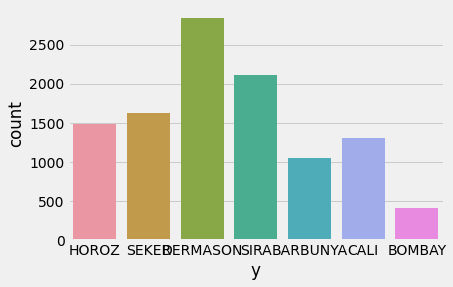

In [10]:
print(df['y'].value_counts())
_ = sns.countplot(x='y', data=df)

**Number of instancs for each class , Dermason has the highest number.**

# 4- Data Visualization
**Heatmap**
### 4.1 Check correlation between features

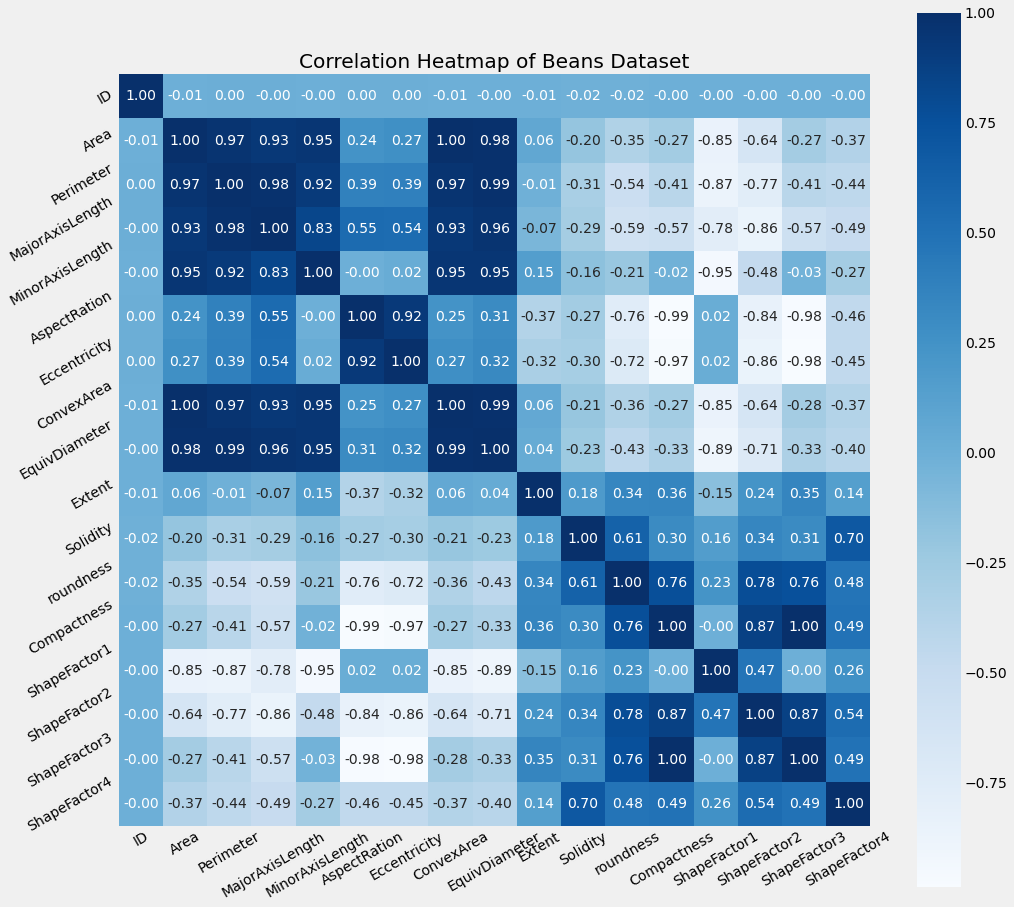

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, cmap='Blues', square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

From this correlation matrix we can exctract features that are strongly correlated like : 
- Area
- Perimeter
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

Features to be drobbed : 

- ShapeFactor3
- Compactness
- AspectRation
- Area
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

### 4.2 Pair Plot of values in each feature

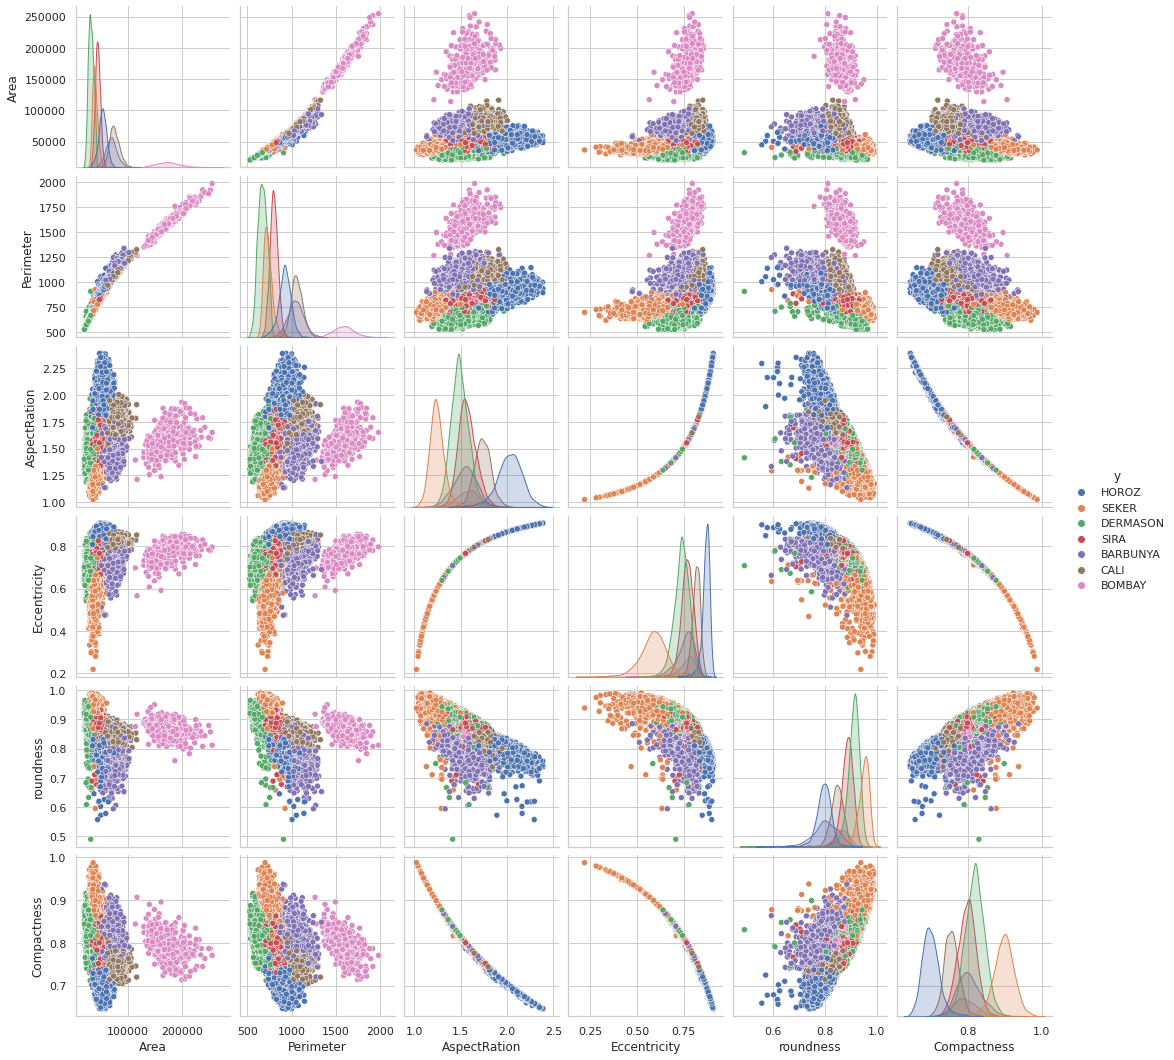

In [12]:
Strongly_corr_features = df[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","y"]]
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="y")

**From the graph above, Linear and log relations can be detected.**
</br>
**Next step will be Detecting how Beans classes can be effected by many features ..**

### 4.3 Display distribution of values in each feature

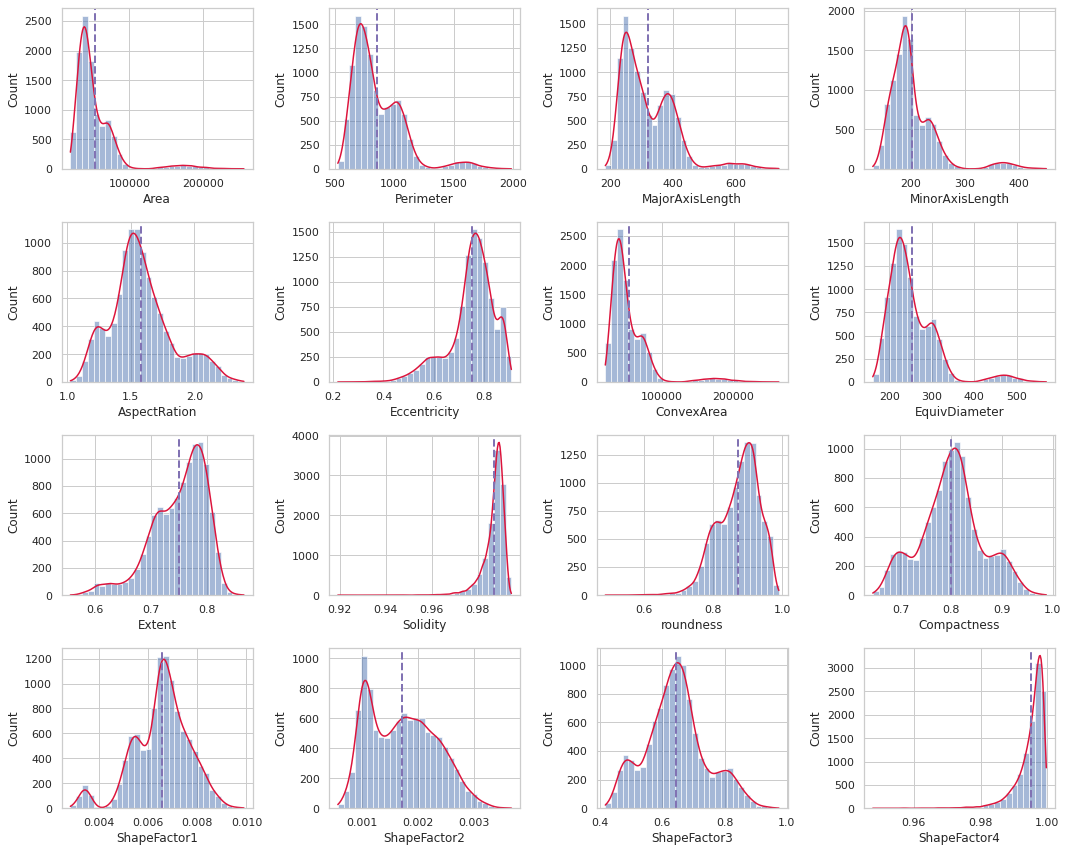

In [13]:
Numeric_cols = df.drop(columns=['y', 'ID']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

### 4.4  Check for outliers

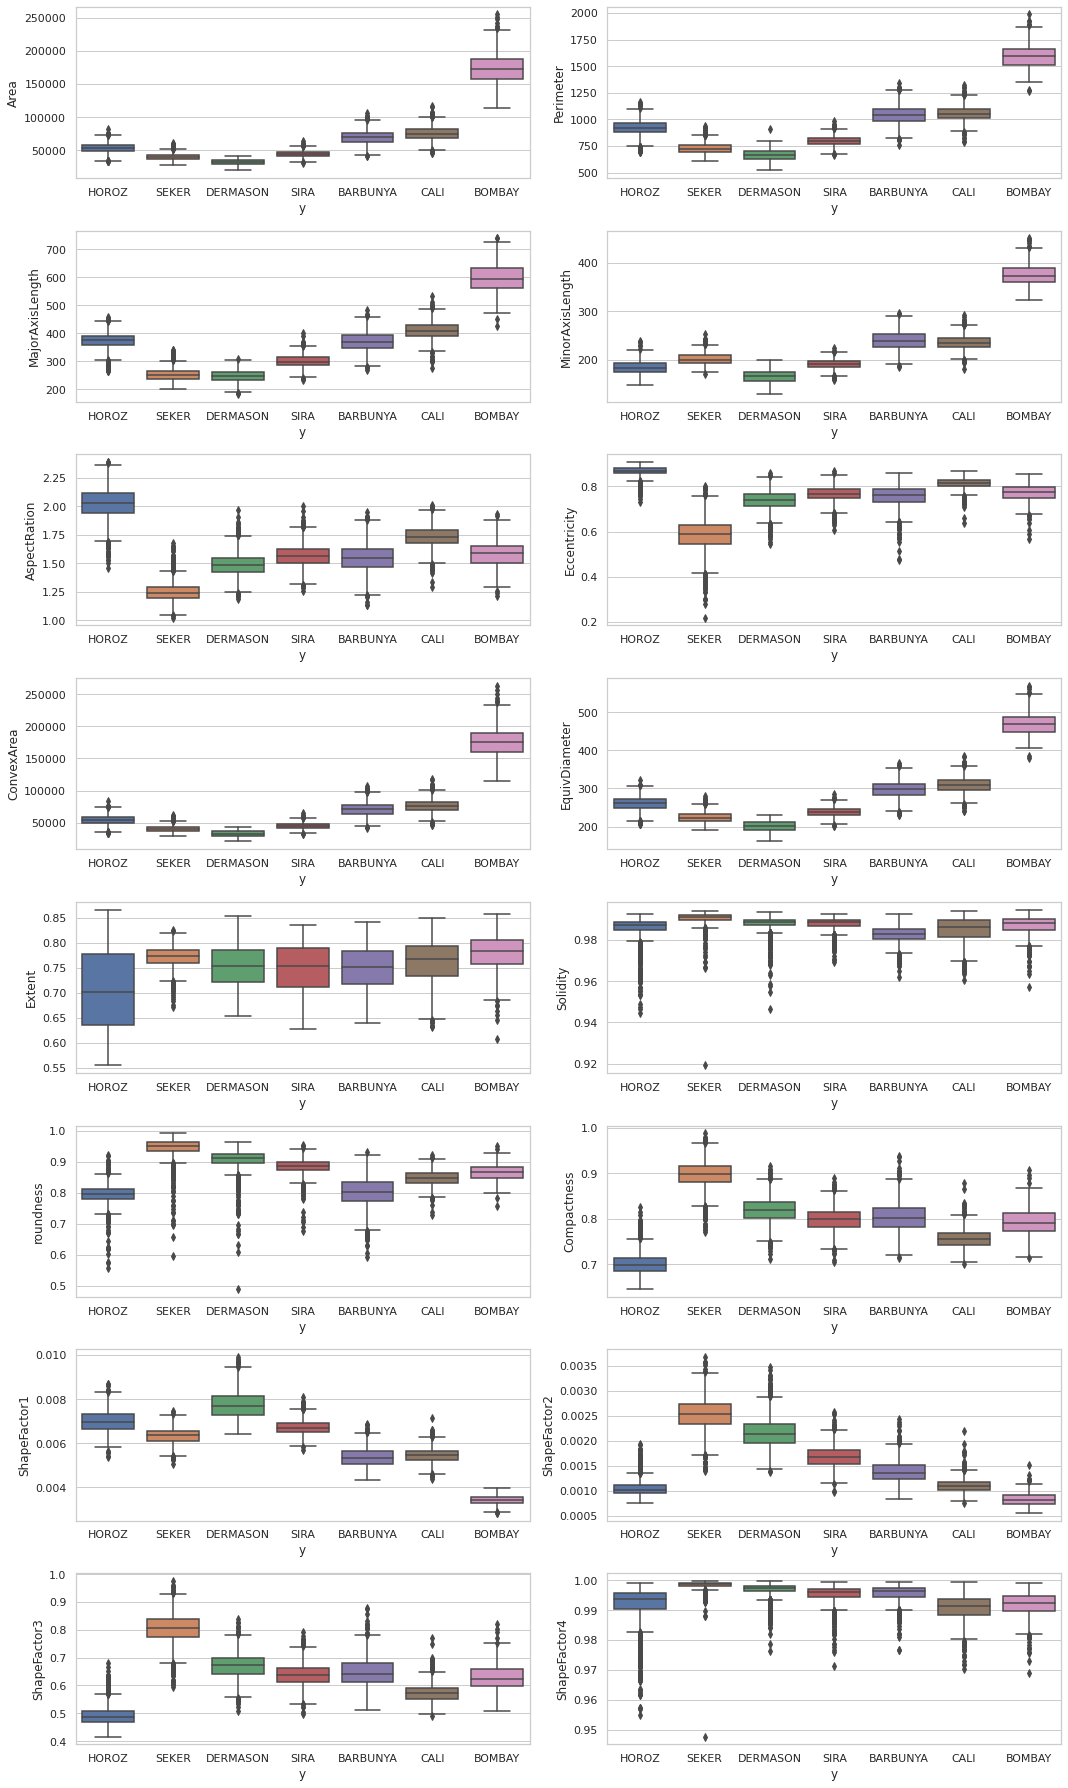

In [14]:
Numeric_cols = df.drop(columns=['y', 'ID']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['y'], y= df[variable], ax=subplot)
plt.tight_layout()

- A perimeter is  a path that encompasses/surrounds/outlines a shape or its length. 'Wikipedia'
- The above graph shows that (BOMBAY) has the highest perimeter

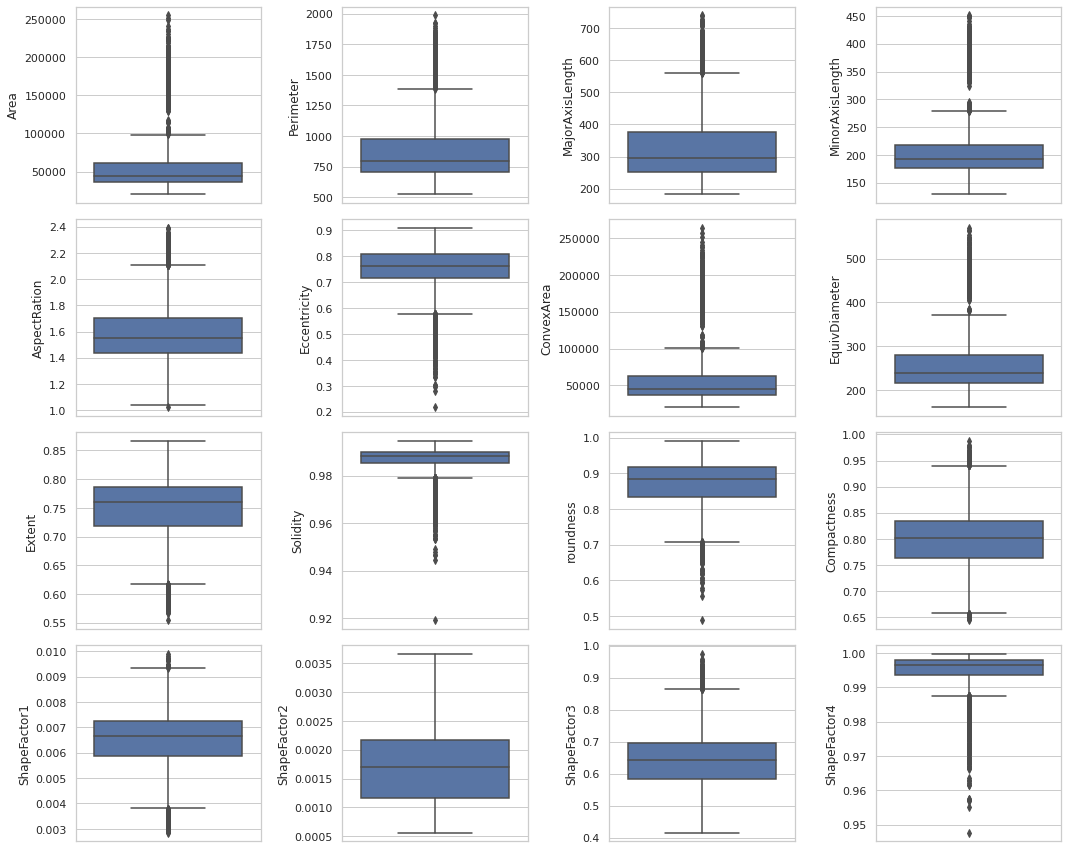

In [15]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

# 5- Feature Engineering

In [16]:
df.describe(percentiles=[.25, .5, .75, 0.995]).T

,count,mean,std,min,25%,50%,75%,99.5%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10778.835000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,200705.420000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1716.551280,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,653.014248,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,400.636925,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.248644,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.895673,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,203320.565000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,505.515655,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.830903,0.866195


**Features like:** (Eccentricity , Extent ,Solidity ,roundness ,Compactness ,and shapeFactor1,2,3,4 ) **ranges between (0 and 1)**

**On the other side , there are other features like:**
- (Area) ranges between (20420 and 254616 )
- (ConvexArea) ranges between (20684 and 263261 )

When a dataset has values of different columns at different scales, it gets tough to analyze the trends and patterns , so we need to make sure that all the columns have a significant difference in their scales, and they can be modified in such a way that all those values fall into the same scale. This process is called Scaling.

### 5.1 Encode labels (for Ensemble algorithm)

In [17]:
features = df.drop(columns=['y', 'ID'])
labels = df['y']

In [18]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
# labels_val_encoded = le.fit_transform(labels_val)
# print(labels_train_encoded)
print(labels_encoded)

[4 5 3 ... 2 6 3]


### 5.2 Oversampling for Impalanced Data

In [19]:
oversample = SMOTE(k_neighbors=7)
features, labels_encoded= oversample.fit_resample(features, labels_encoded)
counter = Counter(labels_encoded)
for k,v in counter.items():
    per = v / len(labels_encoded) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=4, n=2837 (14.286%)
Class=5, n=2837 (14.286%)
Class=3, n=2837 (14.286%)
Class=6, n=2837 (14.286%)
Class=0, n=2837 (14.286%)
Class=2, n=2837 (14.286%)
Class=1, n=2837 (14.286%)


### 5.3 Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 


In [20]:
features_train, features_val, labels_train, labels_val = train_test_split(features, labels_encoded, test_size=0.06, random_state=0, stratify = labels_encoded, shuffle=True)

In [21]:
print(features_train.shape, labels_train.shape, features_val.shape, labels_val.shape)

(18667, 16) (18667,) (1192, 16) (1192,)


### 5.4 Display beans class distribution

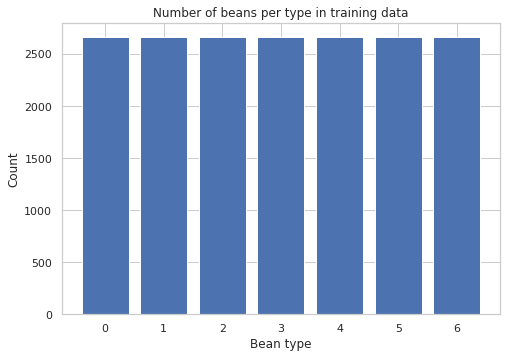

In [22]:
plt.figure(figsize = (7, 5))
plt.bar((pd.DataFrame(labels_train).groupby(0).size()).index, (pd.DataFrame(labels_train).groupby(0).size()))
plt.xlabel("Bean type")
plt.ylabel("Count")
plt.title("Number of beans per type in training data")
plt.show()

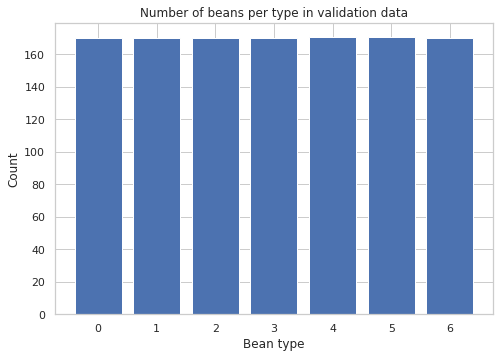

In [23]:
plt.figure(figsize = (7, 5))
plt.bar((pd.DataFrame(labels_val).groupby(0).size()).index, (pd.DataFrame(labels_val).groupby(0).size()))
plt.xlabel("Bean type")
plt.ylabel("Count")
plt.title("Number of beans per type in validation data")
plt.show()

### 5.5  Normalize feature values

In [24]:
# sc = MinMaxScaler()
# df_scaled = sc.fit_transform(features_train)
# features_train = pd.DataFrame(df_scaled , columns= df.columns.difference(['ID','y']))
# #features_train = features_train.drop(columns=['ShapeFactor1','ShapeFactor3','EquivDiameter','Area','Perimeter','AspectRation'])

# df_scaled = sc.fit_transform(features_val)
# features_val = pd.DataFrame(df_scaled , columns= df.columns.difference(['ID','y']))
# #features_val = features_val.drop(columns=['ShapeFactor1','ShapeFactor3','EquivDiameter','Area','Perimeter','AspectRation'])

In [25]:
#features_train.min()

In [26]:
#features_train.max()

In [27]:
#features_train.describe(percentiles=[.25, .5, .75, 0.995]).T

In [28]:
#features_val.describe(percentiles=[.25, .5, .75, 0.995]).T

In [29]:
#features_val.min()

In [30]:
#features_val.max()

In [31]:
# le = LabelEncoder()
# labels_train_encoded = le.fit_transform(labels_train)
# labels_val_encoded = le.fit_transform(labels_val)
# print(labels_train_encoded)
# print(labels_val_encoded)

# 6- Model Training

### 6.1 Logistic Regression

In [32]:
LogisticRegression = make_pipeline(RobustScaler(),
                    PCA(n_components=13, whiten=True),
                    LogisticRegression(max_iter=4000000,C=15,solver='sag')).fit(features_train, labels_train)

print("Logistic Regression Training F1-scores:", f1_score(labels_train, LogisticRegression.predict(features_train), average='micro'))
print("Logistic Regression Validation F1-scores:", f1_score(labels_val, LogisticRegression.predict(features_val), average='micro'))

Logistic Regression Training F1-scores: 0.9458402528526276
Logistic Regression Validation F1-scores: 0.9421140939597316


### 6.2 Random Forest Classifier

In [33]:
randomClassifier =  make_pipeline(RobustScaler(),
                    PCA(n_components=13, whiten=True),
                    RandomForestClassifier(n_estimators = 200)).fit(features_train, labels_train)
#RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 42).fit(features_train, labels_train_encoded)
print("Random Forest Training F1-scores:", f1_score(labels_train, randomClassifier.predict(features_train), average='micro'))
print("Random Forest Validation F1-scores:", f1_score(labels_val, randomClassifier.predict(features_val), average='micro'))

Random Forest Training F1-scores: 1.0
Random Forest Validation F1-scores: 0.9572147651006712


### 6.3 AdaBoost Classifier

In [34]:
# params_ada = {
#     "n_estimators": [5, 10, 15, 20],
#     "learning_rate": [0.4, 0.6, 0.8, 1.0]
# }

In [35]:
#gs_ada = GridSearchCV(AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 42)), param_grid = params_ada, scoring = make_scorer(f1_score , average = "micro"), cv = 4, n_jobs = -1).fit(features_train, labels_train_encoded)

In [36]:
#gs_ada.cv_results_

In [37]:
#gs_ada.best_params_

In [38]:
adaClassifier =  make_pipeline(RobustScaler(),
                               PCA(n_components=13,whiten=True),
                               AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators = 40), n_estimators = 50, learning_rate = 0.01)).fit(features_train, labels_train)
#AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 42), n_estimators = 20, learning_rate = 1.0, random_state = 42).fit(features_train, labels_train_encoded)
train_predicted = adaClassifier.predict(features_train)
val_predicted = adaClassifier.predict(features_val)
print("AdaBoost Training F1-scores:", f1_score(labels_train, train_predicted, average='micro'))
print("AdaBoost Validation F1-scores:", f1_score(labels_val, val_predicted, average='micro'))

AdaBoost Training F1-scores: 1.0
AdaBoost Validation F1-scores: 0.9588926174496645


### 6.4 XGBoost Classifier

In [39]:
xgbClassifier = make_pipeline(RobustScaler(),
                              PCA(n_components=13,whiten=True),
                              XGBClassifier(n_estimators=200,learning_rate=0.07)).fit(features_train, labels_train)
#XGBClassifier(learning_rate=0.07, random_state =42, objective='multi:softproba', max_depth=5, reg_alpha = 0.002, gamma=0.01, verbosity=0).fit(features_train, labels_train_encoded)
train_predicted = xgbClassifier.predict(features_train)
val_predicted = xgbClassifier.predict(features_val)
print("XGB Training F1-scores:", f1_score(labels_train, train_predicted, average='micro'))
print("XGB Validation F1-scores:", f1_score(labels_val, val_predicted, average='micro'))

XGB Training F1-scores: 0.9951786575239728
XGB Validation F1-scores: 0.9614093959731544


### 6.5 Support Vector Machine

In [40]:
SVCClassifier = make_pipeline(RobustScaler(),
                              PCA(n_components=13,whiten=True),
                              SVC(kernel='rbf',degree=7,C=20,probability=True)).fit(features_train, labels_train)
#XGBClassifier(learning_rate=0.07, random_state =42, objective='multi:softproba', max_depth=5, reg_alpha = 0.002, gamma=0.01, verbosity=0).fit(features_train, labels_train_encoded)
train_predicted = SVCClassifier.predict(features_train)
val_predicted = SVCClassifier.predict(features_val)
print("SVC Training F1-scores:", f1_score(labels_train, train_predicted, average='micro'))
print("SVC Validation F1-scores:", f1_score(labels_val, val_predicted, average='micro'))

SVC Training F1-scores: 0.963411367654149
SVC Validation F1-scores: 0.9572147651006712


### 6.6 Voting Classifier

In [41]:
votingClassifier = VotingClassifier(estimators=[('SVC', SVCClassifier), ('logist', LogisticRegression), ('rf', randomClassifier), ('ada', adaClassifier), ('xgb', xgbClassifier)], voting='soft').fit(features_train, labels_train)
train_predicted = votingClassifier.predict(features_train)
val_predicted = votingClassifier.predict(features_val)
print("Voting Training F1-scores:", f1_score(labels_train, train_predicted, average='micro'))
print("Voting Validation F1-scores:", f1_score(labels_val, val_predicted, average='micro'))

Voting Training F1-scores: 0.9879466438099319
Voting Validation F1-scores: 0.962248322147651


### 6.6 Validation Data Confusion Matrix

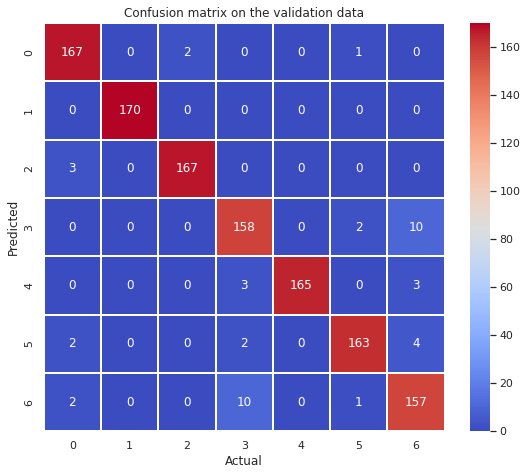

In [42]:
plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(labels_val, val_predicted),
            annot = True,
            fmt = ".0f",
            cmap = "coolwarm",
            linewidths = 2, 
            linecolor = "white",
            xticklabels = votingClassifier.classes_,
            yticklabels = votingClassifier.classes_)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion matrix on the validation data")
plt.show()

# 7- Model Prediction 

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 


### 7.1  Read Test Data

In [43]:
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02/'
df_test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


### 7.2  Normalize test values

In [44]:
features_test = df_test.drop(columns = ['ID'])
#features_test = features_test.drop(columns=['ShapeFactor1','ShapeFactor3','EquivDiameter','Area','Perimeter','AspectRation', 'MajorAxisLength'])

### 7.3 predicting test labels

In [45]:
features_test_predicted = votingClassifier.predict(features_test)

# add y column to the test data
df_test['y'] = le.inverse_transform(features_test_predicted)

df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


# 8- Submission File Generation

In [46]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)